¡Holaaaaaa! 

En esta ocasión vamos a trabajar con una [API Financiera](https://financialmodelingprep.com/developer/docs)

La razón de este proyecto es mostrarles una manera rapida de analizar cuantitativamente empresas. He pasado el ultimo año desarrollando modelos financieros, soy un "hobbyista" de las finanzas. Siempre me intereso el mundo de las finanzas corporativas y las valuaciones como un mero pasatiempo.

![png](/img/financial_api/modelo1.png)

![png](/img/financial_api/modelo2.png)

![png](/img/financial_api/modelo3.png)

![png](/img/financial_api/modelo4.png)

Se el dolor y el amor que uno puede sentir al buscar datos financieros dentro de un reporte anual K10. Por eso hice este proyecto. Hay maneras rapidas de sacar datos financieros sin necesidad de copiar y pegarlos a mano en nuestro Excel. 

En este proyecto aprenderas sobre:

1. Que son las API REST 
2. Como extraer datos de una API
3. Transformar los datos de JSON de una API a un dataframe de Pandas
4. Como graficar los datos con Matplotlib y Numpy
5. Como guardar los datos dentro de un CSV para que los en Excel o R

--- 

#### ¿Que es una API?

Una API es una interfaz que ofrece un servicio de comunicación. A diferencia de una UI (interfaz de usuario) que conecta a una persona con una computadora, una API conecta computadoras o software entre ellos mismos.

Estan hechas de diferentes partes que actuan como herramientas o servicios. Un programador puede llamar a uno de estos servicios a traves de metodos, requests o endpoints que estan definidas en las espicificaciones de una API. 

Pero la API como tal no es practica de usar, debe diseñarse a través de una arquitectura llamada REST que ayuda a manejar la información. 

REST fue propuesta por Roy Thomas en un paper titulado " Architectural Styles and the Design of Network-based Software Architectures", y una idea basica detras de REST es tratar a los datos como objetos que puedes llamar, crear o destruir y a través de metodos y que son representados en formato JSON, XML o RDF. 

| Metodo | Descripcion |
| ----------- | ----------- |
| GET | Trae informacion  |
| POST | Crea informacion | 
| PUT | Actualiza informacion |
| DELETE | Borra informacion | 

[Como explicarle REST a tu esposa](http://www.looah.com/source/view/2284)


Esto es justo lo que haremos ahora. Imaginemos a una API Rest como un ente que nos ayuda a traer datos desde una base externa. Nuestra computadora necesita comunicarse con otra y REST es la mejor forma de hacerlo.

¡Es hora de empezar!


Utilizaremos el modulo **requests** para enviar pedimentos HTTP de manera sencilla. 

HTTP o Hypertext Transfer Protocol es un protocolo Request-Response (pedido y respuesta) cuya funcion principal es establecer una comunicación entre sistemas de la Internet que conforman el World Wide Web (WWW).

Fue diseñado y creado para ser un puente entre los clientes y servidores. Este "puente" tiene metodos definidos que indican acciones deseadas por parte de un cliente hacia un recurso especifico. Lo que el recurso represente depende de lo que se implemento en el servidor. 

Basicamente REST es la manera en que HTTP se debe usar.


#### Extrayendo datos de una API

Hay 3 reglas que se deben seguir para usar una API REST.
1. Definir el metodo
2. Definir los parametros
3. Hacer el request

Nuestro metodo sera de tipo GET que es lo mismo a pedir informacion de la API.
Nuestros parametros seran:
1. La llave de la API (la puedes conseguir creando una cuenta en el portal de la API) 
2. El ticket en la bolsa de la empresa de nuestro interes
3. Los años

En esta ocasion haremos un request de datos financieros del Income Statement de NVDA.
Si lo que quieres es su Balance Sheet o Cash Flow solo cambia esto la parte de income-statement en la URL por balance-sheet o cash-flow

In [ ]:
import requests 
import json

In [3]:
# DEFINIENDO PARAMETROS #
api_key = '27ae1dd809036202bcf78ee64609eb76'
company = "NVDA"
years = 5

# REQUEST GET  con el package Requests.
r = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')
data = r.json()
print(data)
# CON ESTO CREAMOS UN OBJETO de datos tipo lista.

[{'date': '2021-01-31', 'symbol': 'NVDA', 'reportedCurrency': 'USD', 'fillingDate': '2021-02-26', 'acceptedDate': '2021-02-26 17:03:14', 'period': 'FY', 'revenue': 16675000000, 'costOfRevenue': 6279000000, 'grossProfit': 10396000000, 'grossProfitRatio': 0.623448275862069, 'researchAndDevelopmentExpenses': 3924000000, 'generalAndAdministrativeExpenses': 0.0, 'sellingAndMarketingExpenses': 0.0, 'sellingGeneralAndAdministrativeExpenses': 1940000000, 'otherExpenses': 0.0, 'operatingExpenses': 5864000000, 'costAndExpenses': 12143000000, 'interestExpense': 184000000, 'depreciationAndAmortization': 1098000000, 'ebitda': 5691000000, 'ebitdaratio': 0.34128935532233884, 'operatingIncome': 4532000000, 'operatingIncomeRatio': 0.271784107946027, 'totalOtherIncomeExpensesNet': 123000000, 'incomeBeforeTax': 4409000000, 'incomeBeforeTaxRatio': 0.26440779610194903, 'incomeTaxExpense': 77000000, 'netIncome': 4332000000, 'netIncomeRatio': 0.25979010494752625, 'eps': 1.7245222929936306, 'epsdiluted': 1.72

#### Transformando los datos JSON a un DF

La razón por la cual queremos transformar estos datos es por el proposito de manupilación. Trabajar con un JSON no es recomendable pues es dificil analizarlo cuando esta en su estado natural, solo son buenos para pasar información entre servidores. Pandas nos permite transformarlos de una manera super sencilla, solo necesitamos el siguiente pedazo de codigo.

In [ ]:
import pandas as pd

In [30]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   fillingDate                              5 non-null      object 
 4   acceptedDate                             5 non-null      object 
 5   period                                   5 non-null      object 
 6   revenue                                  5 non-null      int64  
 7   costOfRevenue                            5 non-null      int64  
 8   grossProfit                              5 non-null      int64  
 9   grossProfitRatio                         5 non-null      float64
 10  researchAndDevelopmentExpenses           5 non-null   

Listo. Los datos vienen sin valores nulos y estan en buen estado así que podemos manejarlos a partir de ahora en adelante. 
Lo unico que hare es quitar quitar algunas columnas como los ratios pero no es necesario que tu lo hagas si no es necesario. Lo que si es necesario es que apliques un SORT. Esto te permite cambiar el orden del frame a partir de sus fechas, esto con el objetivo de graficar. 

In [31]:
df = df.drop(columns=['reportedCurrency', 
                      'fillingDate', 
                      'acceptedDate', 
                      'period', 
                      'link', 
                      'finalLink', 
                      'symbol', 
                      'grossProfitRatio', 
                      'incomeBeforeTaxRatio', 
                      'netIncomeRatio', 
                      'eps', 
                      'epsdiluted'])

In [14]:
df = df.sort_values("date")

#### Graficando los datos

Bueno, es hora de hacer algnos plots para que veas lo facil que es graficar los datos.
Primero voy a cargar las librerias, despues aplicare una configuración para el tamaño de los plots y por ultimo dividire las columnas de mi interes para que el axis de Y no arroje visualizaciones raras.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
### Este codigo establece la anchura y la altura de los plots (bastante util) 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [15]:
## Este codigo te permite seleccionar las columnas de tu interes con el proposito
## de dividirlas y mejorar la visualización del plot
df[["revenue", "costOfRevenue"]] = df[["revenue", "costOfRevenue"]] / 1000000000

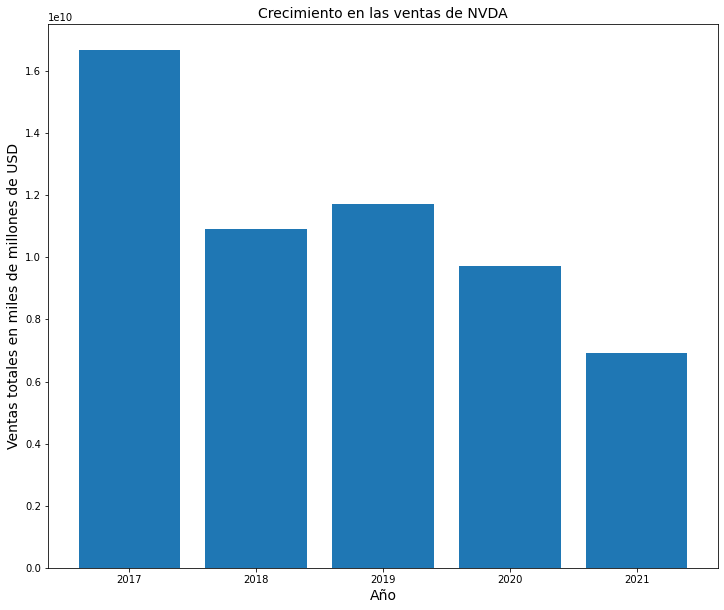

In [38]:
plt.bar(df['date'], df['revenue'])
plt.title('Crecimiento en las ventas de NVDA', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ventas totales en miles de millones de USD', fontsize=14)
plt.xticks(df['date'],['2017', '2018', '2019', '2020', '2021'])
plt.show()

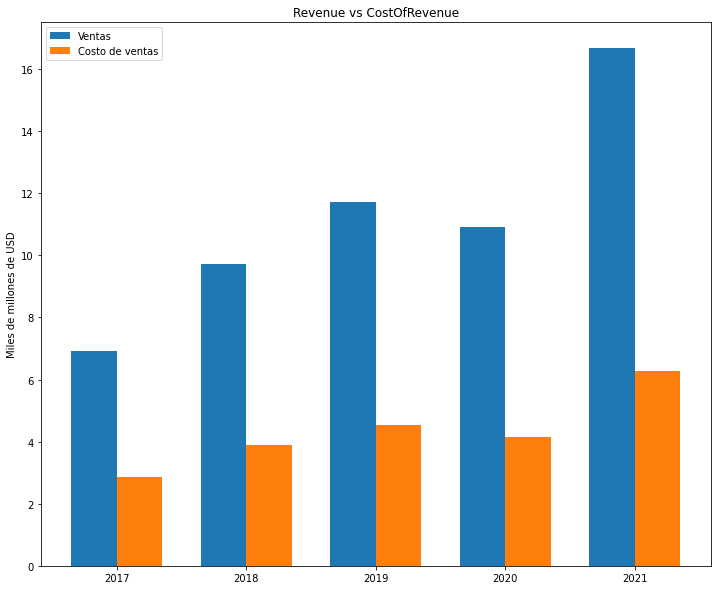

In [18]:
### Localizando los datos

descripcion = ['2017', '2018', '2019', '2020', '2021']
revenue = df["revenue"]
costOfRevenue = df["costOfRevenue"]

### Recorriendo la descripcion

x = np.arange(len(descripcion)) 
width = 0.35  

### Configurando los plots

fig, ax = plt.subplots()
plot1 = ax.bar(x - width/2, revenue, width, label='Ventas')
plot2 = ax.bar(x + width/2, costOfRevenue, width, label='Costo de ventas')

### Añadiendo la descripcion
ax.set_ylabel('Miles de millones de USD')
ax.set_title('Revenue vs CostOfRevenue')
ax.set_xticks(x)
ax.set_xticklabels(descripcion)
ax.legend()


plt.show()

#### Creando un csv

Si lo anterior te parecio dificil, no te preocupes. Siempre existen soluciones y de hecho me parece que utilizar Python para este tipo de cosas (visualizar frames tan pequeños) es innecesario. Para eso tenemos Excel.

Con el siguiente pedazo de codigo vas a poder crear un csv con los datos que sacaste del API. 

In [39]:
df.to_csv('NVDA.csv', index = False)

Bueno, esto es todo! Espero que este proyecto te ayude con tus objetivos profesionales y no profesionales. Si necesitas ayuda siempre puedes mandarme un mensaje a joluistello@gmail.com. 

Un abrazo!